In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gtfile='/Users/irffanalahi/Research/Research_update/GENE/Someresults/Bcell_toxicity/downstream/ALL_tox_gt.txt'

gtdf=pd.read_csv(gtfile,sep='\t',index_col=0)
gtdf.head()

,Toxicity
Mixture,
YUTACI,0.0
YUTORY,3.0
YULENIO,NaN
YUAMIGO,3.0
YUZIRG,0.0


In [2]:
gtdf=gtdf[gtdf['Toxicity'].notna()]
gtdf.head()

,Toxicity
Mixture,
YUTACI,0.0
YUTORY,3.0
YUAMIGO,3.0
YUZIRG,0.0
YUSMAL,3.0


In [3]:
gtdf.shape

(48, 1)

In [4]:
promoter_avg_file='/Users/irffanalahi/Research/Research_update/GENE/Someresults/Bcell_toxicity/downstream/melanoma_bg_EMbatch2_all_matrix_intesectedwith_Bcell_toxicity_promoter_singleValue.txt_Bcell_toxicity_promoter_singleValue.txt_forregression/IL17A.txt_mean.txt'
promoter_avg_df=pd.read_csv(promoter_avg_file,sep='\t',index_col=0)

promoter_avg_df.head()

,IL17A_mean
Mixture,
YUADD-20-4110,0.875091
YUBLIT-11-2164,0.645000
YUBRET-15-3411,0.773636
YUBUMP-14-3166,0.812636
YUCEVO-20-4119,0.766818


In [5]:
genename=promoter_avg_df.columns[0].replace('_mean','')
genename

'IL17A'

In [6]:
promoter_avg_df['1-avg promoter methylation']=1-promoter_avg_df[promoter_avg_df.columns[0]]

In [7]:
promoter_avg_df.shape

(23, 2)

In [8]:
merged=promoter_avg_df.merge(gtdf,left_index=True, right_index=True)

merged.shape

(17, 3)

In [9]:
merged.head()

,IL17A_mean,1-avg promoter methylation,Toxicity
Mixture,,,
YUADD-20-4110,0.875091,0.124909,0.0
YUBLIT-11-2164,0.645000,0.355000,2.0
YUBRET-15-3411,0.773636,0.226364,2.0
YUBUMP-14-3166,0.812636,0.187364,0.0
YUCEVO-20-4119,0.766818,0.233182,1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


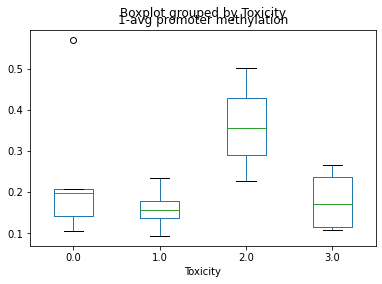

In [10]:
merged.boxplot(by ='Toxicity', column =['1-avg promoter methylation'], grid = False)

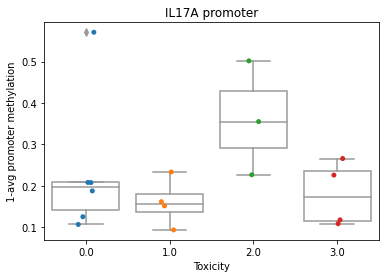

In [11]:
ax = sns.boxplot(x="Toxicity", y='1-avg promoter methylation', data=merged,color='white')
ax = sns.stripplot(x="Toxicity", y='1-avg promoter methylation', data=merged)
plt.title(genename+" promoter")
plt.savefig(promoter_avg_file+".pdf")